In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score

In [4]:
# Load reduced pca transformed dataset
train_data = pd.read_csv('../data/pca_transformed_dataset/pca_transformed_train_data.csv')
test_data = pd.read_csv('../data/pca_transformed_dataset/pca_transformed_test_data.csv')

# Split to X_train, X_test, y_train, y_test
X_train = train_data[train_data.columns[:-1]]
X_test = test_data[test_data.columns[:-1]]

y_train = train_data['goal']
y_test = test_data['goal']

# Prepare the train and test data
X_train_scaled = X_train.to_numpy()
X_test_scaled = X_test.to_numpy()

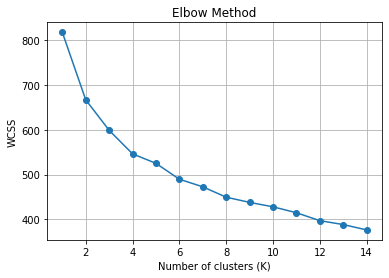

In [5]:
# Determine optimal K using Elbow method on X_train_scaled
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

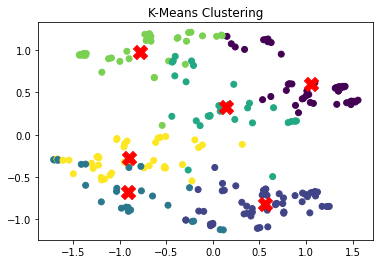

In [6]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_train_scaled)

# Plot the results
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, color='red', linewidths=1, label='Centroids')
plt.title("K-Means Clustering")
plt.show()

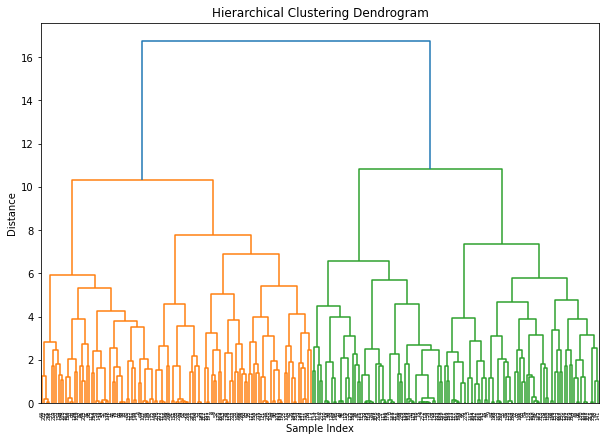

In [7]:
# Perform Hierarchical clustering
linked = linkage(X_train_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [8]:
# Predicted cluster labels for training data
cluster_labels = kmeans.labels_
cluster_labels = np.where(cluster_labels > 0, 1, cluster_labels)

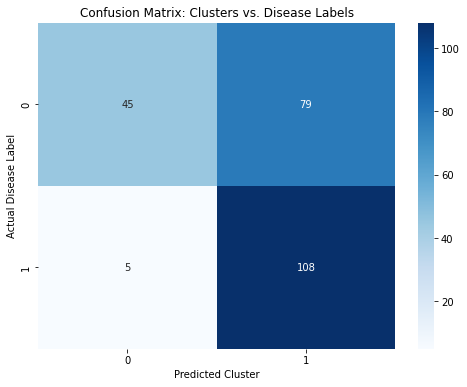

In [9]:
# Shows how well clusters match actual disease classes
cm = confusion_matrix(y_train, cluster_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Disease Label")
plt.title("Confusion Matrix: Clusters vs. Disease Labels")
plt.show()

In [10]:
# Corrects for chance; 1 = perfect match, 0 = random
ari = adjusted_rand_score(y_train, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.0815


In [11]:
nmi = normalized_mutual_info_score(y_train, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

Normalized Mutual Information (NMI): 0.1426
